# InsideOut Final Project Shenkar College 2024

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset 2

In [3]:
dset2 = pd.read_csv('dataset2.csv')
ds2 = dset2.drop(['BlindedIDs', 'PATIENT_ID', 'DC_STUDY_ID'], axis=1)

## Data Exploration

In [4]:
# Summary statistics
ds2.describe()

,Stratagene,IN_DC_STUDY,AGE_AT_DIAGNOSIS,MONTHS_TO_FIRST_PROGRESSION,MEDIAN_INTENSITY_UNNORMALIZED,PCT_ARRAY_OUTLIER,PCT_SINGLE_OUTLIER,LABORATORY_BATCH
count,505.000000,505.000000,478.000000,188.000000,499.000000,499.000000,499.000000,392.000000
mean,0.039604,0.914851,64.439331,21.370053,192.270541,2.749958,0.293108,13.102041
std,0.195220,0.279379,10.089509,20.228202,0.556951,1.691131,0.215912,7.223491
min,0.000000,0.000000,33.000000,0.460000,190.000000,0.494000,0.052000,1.000000
25%,0.000000,1.000000,58.000000,7.000000,192.000000,1.645000,0.151500,7.000000
50%,0.000000,1.000000,65.000000,14.000000,192.000000,2.365000,0.230000,12.000000
75%,0.000000,1.000000,72.000000,28.250000,193.000000,3.303000,0.359000,19.250000
max,1.000000,1.000000,87.000000,102.000000,194.000000,21.649000,1.787000,26.000000


In [93]:
# basic information about the dataset
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Stratagene                        505 non-null    int64  
 1   MICROARRAY                        505 non-null    object 
 2   SITE                              505 non-null    object 
 3   TESTTYPE                          505 non-null    object 
 4   IN_DC_STUDY                       505 non-null    int64  
 5   GENDER                            478 non-null    object 
 6   AGE_AT_DIAGNOSIS                  478 non-null    float64
 7   RACE                              478 non-null    object 
 8   ADJUVANT_CHEMO                    478 non-null    object 
 9   ADJUVANT_RT                       478 non-null    object 
 10  VITAL_STATUS                      478 non-null    object 
 11  FIRST_PROGRESSION_OR_RELAPSE      403 non-null    object 
 12  MONTHS_T

In [11]:
# unique values by feature
ds2.nunique() \
	.sort_values(ascending=False) \
	.to_frame('Unique Values') \
	.assign(Percentage=lambda x: (x['Unique Values'] / len(ds2)) * 100) \
	.round(2)

,Unique Values,Percentage
MICROARRAY,505,100.00
PCT_ARRAY_OUTLIER,378,74.85
MONTHS_TO_LAST_CONTACT_OR_DEATH,354,70.10
MTHS_TO_LAST_CLINICAL_ASSESSMENT,344,68.12
PCT_SINGLE_OUTLIER,320,63.37
MONTHS_TO_FIRST_PROGRESSION,112,22.18
AGE_AT_DIAGNOSIS,50,9.90
LABORATORY_BATCH,26,5.15
RACE,6,1.19
MEDIAN_INTENSITY_UNNORMALIZED,5,0.99


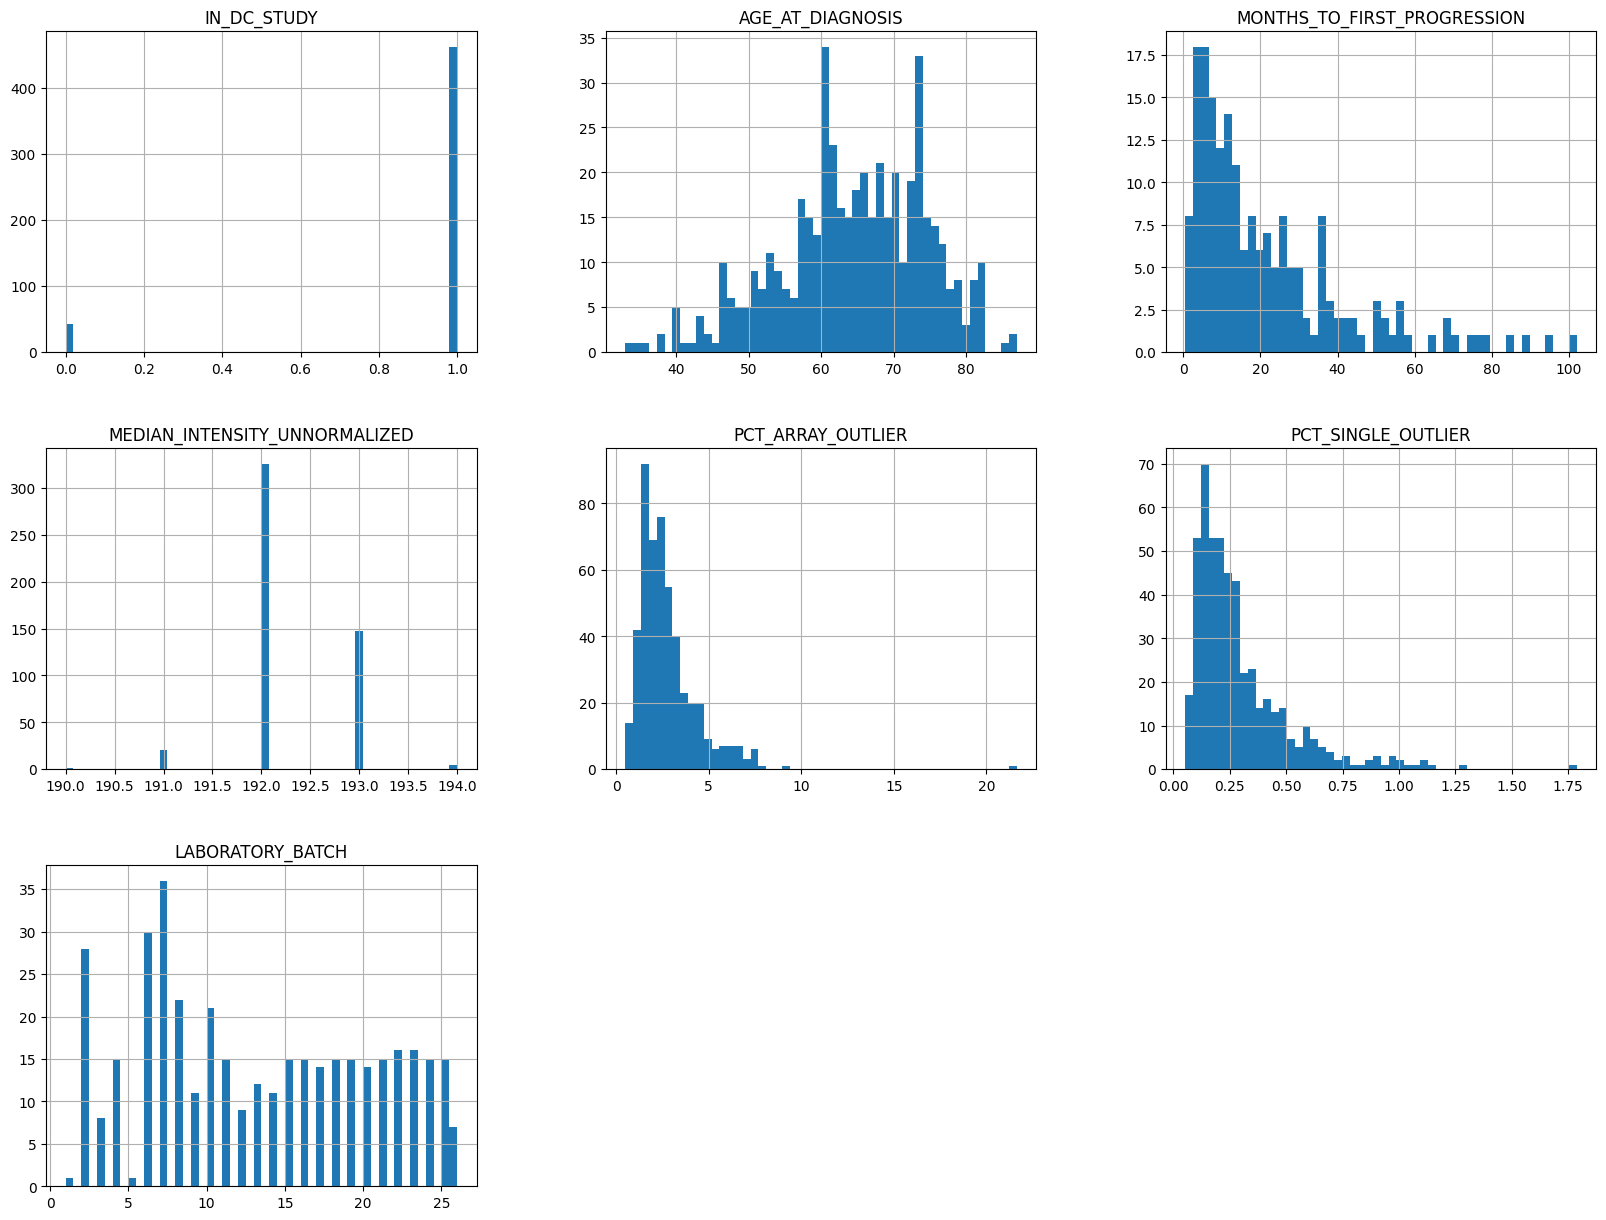

In [95]:
# Plot histograms for numerical columns
ds2.drop(['Stratagene'], axis=1).hist(bins=50, figsize=(20,15))
plt.show()

# Preprocessing

## Nulls And Missing Values

In [7]:
# Identifying missing values
print("Missing values in each column:")
ds2.isnull().sum().to_frame('Missing Values')


Missing values in each column:


,Missing Values
Stratagene,0
MICROARRAY,0
SITE,0
TESTTYPE,0
IN_DC_STUDY,0
GENDER,27
AGE_AT_DIAGNOSIS,27
RACE,27
ADJUVANT_CHEMO,27
ADJUVANT_RT,27


Percentage of missing values in each column:
 Stratagene                           0.000000
MICROARRAY                           0.000000
SITE                                 0.000000
TESTTYPE                             0.000000
IN_DC_STUDY                          0.000000
GENDER                               5.346535
AGE_AT_DIAGNOSIS                     5.346535
RACE                                 5.346535
ADJUVANT_CHEMO                       5.346535
ADJUVANT_RT                          5.346535
VITAL_STATUS                         5.346535
FIRST_PROGRESSION_OR_RELAPSE        20.198020
MONTHS_TO_FIRST_PROGRESSION         62.772277
MTHS_TO_LAST_CLINICAL_ASSESSMENT     8.910891
MONTHS_TO_LAST_CONTACT_OR_DEATH      6.930693
SMOKING_HISTORY                      5.742574
SURGICAL_MARGINS                     7.524752
PATHOLOGIC_N_STAGE                   7.326733
PATHOLOGIC_T_STAGE                   7.326733
MEDIAN_INTENSITY_UNNORMALIZED        1.188119
PCT_ARRAY_OUTLIER                 

<Axes: >

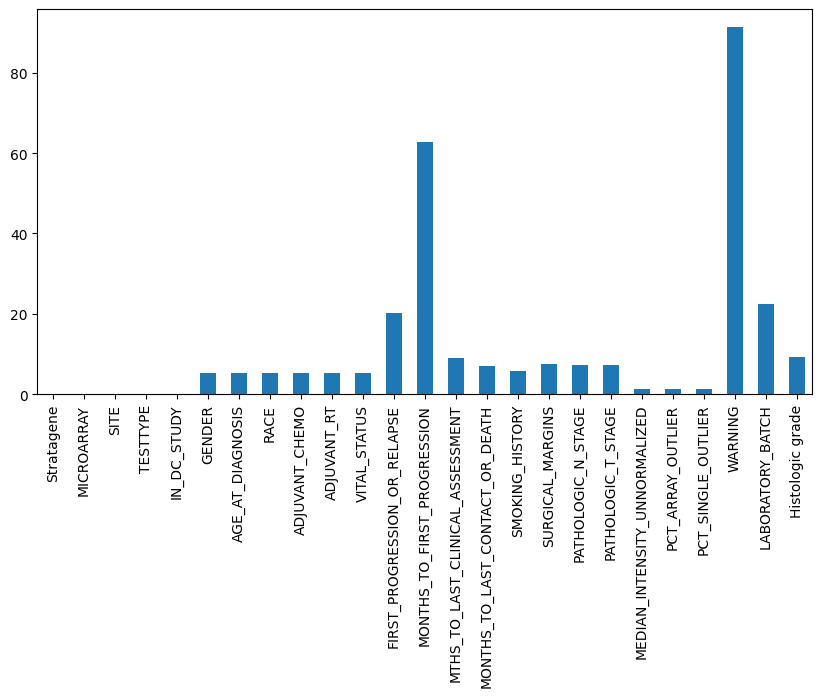

In [105]:
# Percentage of missing (null) values in each column of the DataFrame 'ds2'
missing_percentage = ds2.isnull().sum() / len(ds2) * 100
print("Percentage of missing values in each column:\n", missing_percentage)
missing_percentage.plot(kind='bar', figsize=(10,5))

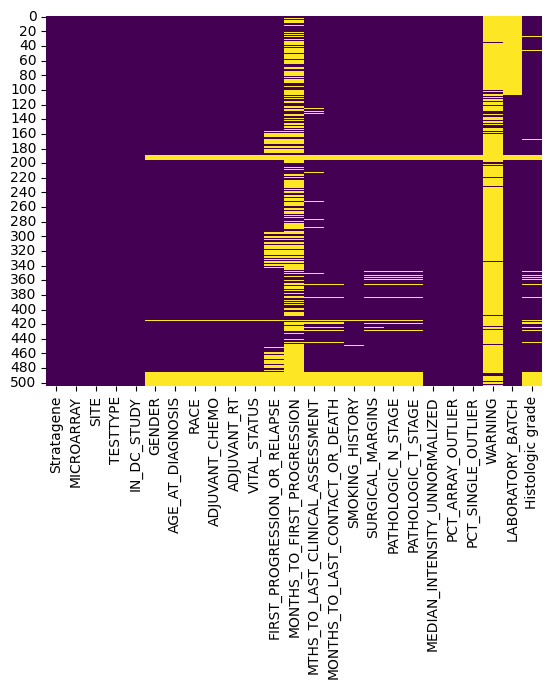

In [106]:
# Visualize missing values
sns.heatmap(ds2.isnull(), cbar=False, cmap='viridis')
plt.show()

Conclusions from Missing Data Heatmap Analysis

- Extensive missing data in several features, especially in `'WARNING'` and `'MONTHS_TO_FIRST_PROGRESSION'`, requiring attention.
- Some features are complete with no missing data, suggesting they can be reliably used in analyses.
- The pattern of missingness is not random; certain features have systematic gaps indicating potential data collection issues
- Features with high missingness may need complex imputation or exclusion from the dataset.
- The missing data could affect the integrity of any statistical analysis or predictive modeling.


In [109]:
warnings = ds2['WARNING']
warnings.unique()

array([nan, '*'], dtype=object)

Notes on `'WARNING'` Feature in `ds2` DataFrame

- Upon investigation of the `'WARNING'` column, we found that it contains only two unique values: `NaN` (missing value) and the asterisk `*`.
- The asterisk does not convey any useful quantitative or categorical information that could contribute to further analysis or predictive modeling.
- Given that the column does not contain actionable data, and considering best practices in data cleaning, the 'WARNING' feature can be considered for removal from the dataset.
- Dropping this column may help streamline the dataset, making it more manageable and potentially improving the performance of any analytical or machine learning models applied thereafter.

Action
- We will proceed to drop the 'WARNING' column from the `ds2` DataFrame.


In [110]:
ds2 = ds2.drop('WARNING', axis=1)

In [117]:
# count the non missing values in MONTHS_TO_FIRST_PROGRESSION and compare with the total number of rows
print("Number of non missing values in MONTHS_TO_FIRST_PROGRESSION: ", ds2['MONTHS_TO_FIRST_PROGRESSION'].count())

Number of non missing values in MONTHS_TO_FIRST_PROGRESSION:  188
Total number of rows:  505


In [119]:
ds2['Histologic grade'].unique()

array(['POORLY DIFFERENTIATED', 'Moderate Differentiation',
       'WELL DIFFERENTIATED', nan], dtype=object)

In [122]:
# count the number of rows with only VITAL_STATUS missing (but Histologic grade is not missing)
print(f"{ds2.loc[ds2['VITAL_STATUS'].isnull() & ds2['Histologic grade'].notnull()].shape[0]} rows with only VITAL_STATUS missing")
# count the number of rows with only VITAL_STATUS missing (but VITAL_STATUS is not missing)
print(f"{ds2.loc[ds2['Histologic grade'].isnull() & ds2['VITAL_STATUS'].notnull()].shape[0]} rows with only Histologic grade missing")
# count the number of rows with both VITAL_STATUS and Histologic grade missing
print(f"{ds2.loc[ds2['Histologic grade'].isnull() & ds2['VITAL_STATUS'].isnull()].shape[0]} rows with both Histologic grade and VITAL_STATUS missing")

0 rows with only VITAL_STATUS missing
19 rows with only Histologic grade missing
27 rows with both Histologic grade and VITAL_STATUS missing


## Features Data Types


In [4]:
ds2.dtypes.to_frame('Data Type')

,Data Type
Stratagene,int64
MICROARRAY,object
SITE,object
TESTTYPE,object
IN_DC_STUDY,int64
GENDER,object
AGE_AT_DIAGNOSIS,float64
RACE,object
ADJUVANT_CHEMO,object
ADJUVANT_RT,object


### Categorical Features

#### STRATAGENE Feature

Stratagene in dataset 2 is a categorical feature with 2 values: 0 and 1.

In [45]:
print(f"Values: {ds2['Stratagene'].unique()}")
# find numbers of rows with 0 in Stratagene column and 1 in stratagene column
ds2['Stratagene'].value_counts()

Values: [0 1]


Stratagene
0    485
1     20
Name: count, dtype: int64

We will change the feature dtype from int64 to category

In [57]:
ds2['Stratagene'] = ds2['Stratagene'].astype('category')


#### `SITE` Feature

In [66]:
print(f"Values: {ds2['SITE'].unique()}")
# change the SITE feature to categorical
ds2['SITE'] = ds2['SITE'].astype('category')

Values: ['MSKCC', 'DFCI', 'MI', 'HLM']
Categories (4, object): ['DFCI', 'HLM', 'MI', 'MSKCC']


#### TESTTYPE Feature

`TESTTYPE` in datasets 2

In [67]:
print(f"Values: {ds2['TESTTYPE'].unique()}")

Values: ['Test 1' 'Test 2' 'Train']
